Vamos a ver como identificar y excluir los outliers o puntos fuera de la curva, vamos a trabajar con nuestra libreria de matplot.

In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [3]:
dt=pd.read_csv(r"C:\Users\User\Desktop\dataScience\pandasDatos\alquilerResidencial.csv",sep=";")
dt.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,16.67,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,50.00,Departamento


<Axes: >

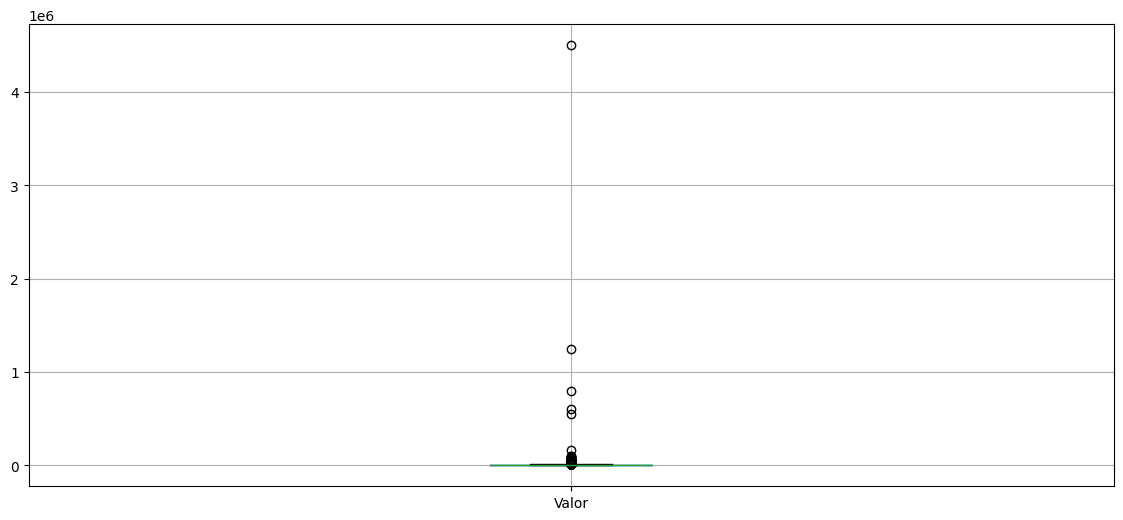

In [4]:
#tenemos que crear el boxplot que es un grafico que va a dividir nuestro df en cuartiles y tomara la media de esos datos, ese boxplot  tendra un limite inferiro y otro superiro que es donde estaran nuestros outliers o los datos fuera del rango,para crear el grafico boxplot simplemente invocamos el metodo boxplot() y le debemos pasar una columna que se pueda medir,osea que tenga valores medibles. Este grafico muestra donde se encuentra la concentracion de nuestros datos, en este caso estan en la parte inferior.El le6 significa logaritmo6,en si esta creando estos 4 indices pero por ese logaritmo se deben leer como si estuvieran de 1millon en 1 millon, entonces nuestros datos estan en el rango de los 500mil dolares y un poco mas.
dt.boxplot(['Valor'])

In [5]:
#los datos que estan fuera del rango son los outliers, entonces en este caso seran los que estan en un valor mayor a 500mil,para verlos hacemos asi:
dt[dt['Valor']>=500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
7731,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
10774,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12822,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
14023,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
15715,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [6]:
#tenemos 5 valores outliers en nuestro df, para eliminar estos outliers y asi tener un df con valores correctos creamos nuestros cuartiles utilizando la grafica del boxplot.Primero capturamos todos los datos de la columna Valor en una variable.
valor=dt['Valor']


In [7]:
#ahora con esos datos creamos nuestros cuartiles utilizando el metodo quantile() de pandas, el primer cuartil representa el 25% de los datos, el cuartil Q3 representara el 75% restante de los datos,por lo que con esto creamos nuestros cuartiles aplicando las formulas.
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
IIQ=Q3-Q1 #INTERVALO INTERCUARTIL
limiteInferior=Q1-1.5*IIQ
limiteSuperior=Q3+1.5*IIQ

In [8]:
#ahora creamos nuestro criterio de seleccion,osea las condiciones para sacr mi df sin los outliers,en si este criterio tendra 2 condiciones, la primera condicion es que los valores del nuevo df seran mayores o iguales al limite inferior que calculamos, y la segunda que los valores del nuevo df seran menores o iguales al limite superior asi:
seleccion=((valor>=limiteInferior) & (valor<=limiteSuperior))

In [9]:
#Listo,ahora creo mi nuevo df que sera basado en el df original pero debera cumplir el criterio de seleccion asi:
dtNew=dt[seleccion]

In [10]:
#ya con mi nuevo df puedo sacar el boxplot, si no me sale grafica es por una cuestion del vscode, en la grafica sale un cuadro que es donde esta la media de los datos,osea los datos correctos que necesitamos.
dtNew.boxplot(['Valor'])

<Axes: >

In [11]:
#puedo mostrar el histograma,que es un grafico de barras, lo hacemos con el metodo hist().
dtNew.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

In [12]:
#ahora, partiendo del df original nosotros generamos un primer boxplot por la columna Valor,pero estos datos no son los correctos porque no tuvimos en cuenta el tipo de construccion, si fue una casa pues vale mas que una habitacion,entonces lo que debimos haber echo en un principio para sacar el boxplot fue esto:
dt.boxplot(['Valor'], by=['Tipo'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

In [15]:
#entonces, como los valores dependen del tipo de inmueble, vamos a ver como crear nuestro bloxplot pero excluyendo los outliers por grupos,en este caso por tipo de inmueble,primero agrupamos los tipos del df original.Con groupby() crearemos un dataframe pero ahora basados en una columna especifica.Pero como queremos es el valor se lo indicamos pasando esa columna tambien, asi ya no sera un df(osea un conjunto de columnas) sino sera una serie(solo una columna)
grupoTipo=dt.groupby('Tipo')['Valor']
type(grupoTipo)

pandas.core.groupby.generic.SeriesGroupBy

In [17]:
#si ahora utilizamos el metodo groups() veremos el valor de cada uno de los tipos de inmuebles del df
grupoTipo.groups

{'Casa': [1, 22, 54, 57, 97, 101, 146, 162, 182, 241, 253, 256, 267, 289, 313, 319, 338, 343, 361, 382, 389, 403, 428, 438, 479, 480, 486, 517, 548, 549, 574, 579, 580, 626, 630, 639, 644, 645, 670, 686, 710, 731, 734, 771, 782, 792, 869, 886, 953, 999, 1046, 1053, 1136, 1141, 1143, 1175, 1196, 1268, 1275, 1336, 1355, 1370, 1391, 1434, 1448, 1452, 1463, 1468, 1495, 1498, 1511, 1611, 1629, 1681, 1687, 1691, 1696, 1709, 1734, 1742, 1787, 1836, 1861, 1901, 1931, 1959, 1968, 1987, 2046, 2066, 2083, 2102, 2128, 2134, 2135, 2160, 2198, 2229, 2232, 2239, ...], 'Casa comercial': [58, 138, 195, 327, 454, 491, 565, 578, 627, 649, 768, 784, 828, 910, 912, 914, 975, 1061, 1206, 1317, 1401, 1423, 1457, 1521, 1536, 1790, 1976, 2194, 2522, 2549, 2569, 2618, 2626, 2669, 2696, 2832, 2904, 2979, 3135, 3146, 3159, 3249, 3324, 3376, 3378, 3389, 3398, 3613, 3881, 3934, 3994, 4038, 4049, 4510, 4594, 4791, 4818, 4875, 4953, 4980, 5010, 5069, 5092, 5124, 5272, 5326, 5330, 5331, 5399, 5429, 5554, 5673, 5748, 5

In [37]:
#ya agrupados nuestros valores por tipo de inmueble,podemos generar los calculos de los cuartiles para despues generar el boxplot. Con estos calculos lo que obtendremos son las medidas de limites superior e inferior de cada uno de los tipos,pues agrupamos los valores por tipo.
Q1=grupoTipo.quantile(.25)
Q3=grupoTipo.quantile(.75)
IIQ=Q3-Q1 #INTERVALO INTERCUARTIL
limiteInferior=Q1-1.5*IIQ
limiteSuperior=Q3+1.5*IIQ

In [38]:
limiteInferior


Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3250.0
Habitación                0.0
Name: Valor, dtype: float64

In [39]:
#ahora creamos un nuevo df en blanco
#1. Primero, se crea un DataFrame vacío llamado `datos_new`. Este será el DataFrame donde se almacenarán los datos seleccionados.
#2. Luego, se recorre cada tipo de vivienda en el conjunto de datos utilizando el bucle **for**. Por ejemplo, en la base de datos existen 5 tipos de viviendas (Departamento, Habitación, Casa de Villa, etc), el bucle se ejecutará tres veces, una para cada tipo de vivienda.
#3. Dentro del bucle, se crea una condición llamada `eh_tipo` que verifica si el tipo de vivienda en una fila coincide con el tipo de vivienda actual del bucle. Por ejemplo, si el tipo actual es "Departamentio", la condición `eh_tipo` será True para las filas donde el tipo de vivienda sea "Departamento" y False para las filas con otros tipos de vivienda.
#4. Después, se establecen otras condiciones para seleccionar las filas que cumplen ciertos criterios, como estar dentro de ciertos límites.
#5. A continuación, se crea una nueva variable llamada seleccion que combina la condición eh_tipo con otras condiciones utilizando el operador lógico "&". Esto significa que la fila debe cumplir tanto la condición de tipo de vivienda como las otras condiciones para ser seleccionada.
#6. Luego, se seleccionan las filas que cumplen la condición seleccion del DataFrame original y se almacenan en un nuevo DataFrame que es datos_seleccion.
#7. Finalmente, el DataFrame datos_seleccion se agrega al DataFrame datos_new utilizando la función pd.concat(), que concatena los DataFrames. Esto se hace en cada iteración del bucle para ir acumulando las filas seleccionadas.
dtNew=pd.DataFrame()
for tipo in grupoTipo.groups.keys():
    eTipo=dt['Tipo']==tipo
    eDentroLimite=(dt['Valor']>=limiteInferior[tipo]) & (dt['Valor']<=limiteSuperior[tipo])
    seleccion=eTipo&eDentroLimite
    dtSeleccion=dt[seleccion]
    dtNew=pd.concat([dtNew,dtSeleccion])


In [40]:
#ahora ya puedo sacar el boxplot de este nuevo df, el boxplot debera sacar los valores pero agrupados por tipo de inmueble
dtNew.boxplot(['Valor'], by=['Tipo'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

In [41]:
#listo,este nuevo df ya lo puedo enviar al cliente,lo exportamos con un nuevo nombre a un tipo de archivo .csv, este archivo ya tiene los datos correctos sin outliers.
dtNew.to_csv('alquilerResidencialSinOutLiers.csv',sep=';',index=False)